**Shifted Rosenbrock Function**

Environment : Python 3.8.2 & Jupyter Notebook<br>

The objective is to solve unconstrained problem : F3 as described in the “CEC2008_TechnicalReport.pdf” for both dimensions D = 50 and D = 500. <br>
F3: Shifted Rosenbrock <br>

The coordinates of the shifted global minimum of this function in dim = 1000 are provided in a numpy array in a data file "data.py". These are the target coordinates to be achieved.<br>
F3: rosenbrockdat -> shape = (1000,) <br>

The fitness or value of this function at its minimum is also available in numpy array "f_bias" in "data.py". This is the the target fitness value to achieve.<br>
f_bias[2] = F3_min = 390
<img src="Functions.png">

Import Libraries

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

from scipy.optimize import minimize
from psopy import minimize as minimize_pso

**Import Data**

In [18]:
# Import data in data.py file and print shape of input arrays
from data import *
print(rosenbrockdat.shape)
print(f_bias[2])

(1000,)
390.0


- Algorithm : Particle Swarm Optimization because it is a fast algorithm and is suitable for this continuous problem. Also the non-linear conjugate gradient works well. Function F3 is multimodal, quadratic, continuous and derivable (smooth) and despite the very narrow valley from local optimum to global optimum, the CG algorithm converges to the global optimum in a reasonable time.
- Library : psopy(PSO) & Scipy(CG)
- Parameters of the algorithm : Number of particles, stable_iter(Number of iterations to wait before Swarm is declared stable) 
- Stopping criterion : stable_iter = 100
- Number of function evaluations : see below
- Computational time : see below
- Convergence curve : see below
- Final results (solution and fitness) : see below

In [3]:
# Define objective function to minimize
def Shifted_Rosenbrock(x):
    z = np.subtract(x[:dim], rosenbrockdat[:dim]) + 1
    return f_bias[2] + np.sum(
                              100 * np.power(np.subtract(np.power(z[:dim-1], 2), z[1:dim]), 2)
                              + np.power((z[:dim-1]-1), 2)
                             )

def Minimize_CG(func, targetmin=None, tol=None, bounds_min = None, bounds_max = None):
    """Minimize func in dim dimensions using Conjugate Gradient algorithm
       Expected minimum is targetmin"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Initial guess
    x0 = np.random.uniform(bounds_min, bounds_max, dim)
    
    # Store convergence data
    convergdata = []
    def convergcurve(x):
        convergdata.append(func(x))
    
    # Run minimization algorithm
    res = minimize(func, x0, method='CG',
                   options={'gtol': tol, 'disp': True}, callback=convergcurve)
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))

    plt.plot(range(1,len(convergdata)+1),convergdata, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))


def Minimize_PSO(func, targetmin=None, nb_particles=None, stable_iter=None, self_confid=None, swarm_confid=None, 
                 bounds_min = None, bounds_max = None):
    """ Minimize func using Particle Swarm Optimization with a given particle self confidence and swarm condifence
        Stopping condition : Maximum change in best fitness smaller than default tol=1e-6 for stable_iter iterations"""
    
    print("Number of dimensions : {}".format(dim))
    
    since = time.time()
    
    # Generate nb_particles particles of dimension dim, with coordinates between min and max
    x0 = np.random.uniform(bounds_min, bounds_max, (nb_particles, dim))
    
    # Run Particle Swarm Optimization
    res = minimize_pso(func, x0, options={'stable_iter': stable_iter, 'l_rate':self_confid, 'g_rate':swarm_confid, 
                       'verbose' : False, 'savefile': "output.csv"})
    
    # Show results
    print("Computational time : {:.2f} s".format(time.time()-since))
    print("Fitness at minimum (result): {:.4f} ".format(res.fun))
    print("Fitness at minimum (real): {:.4f} ".format(targetmin))
    print("Function evaluations : {}".format(res.nit*nb_particles))

    converg = pd.read_csv("output.csv", sep=",")
    plt.plot(converg.Iter+1, converg.Func, label="Convergence curve")
    plt.axhline(y=targetmin, color="r", label="Actual Minimum = "+str(targetmin))
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.show()
    
    print("x_minimum :\n{}".format(res.x))

D = 50

Particle Swarm Optimization

Number of dimensions : 50
Computational time : 16.15 s
Fitness at minimum (result): 68597.3467 
Fitness at minimum (real): 390.0000 
Function evaluations : 248250


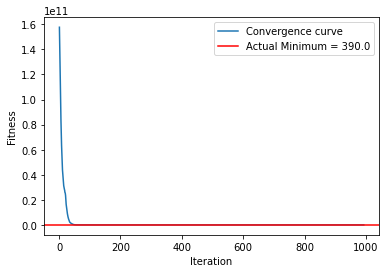

x_minimum :
[-74.47603823 -35.13252141 -59.26843555  37.71449268  53.45602197
 -29.96039433  49.84442866  49.21241615 -73.10402911 -30.46002139
 -43.55027461 -22.23940564  70.73739857  47.3344933  -46.63542501
  -7.99860387 -41.55664567 -16.34049448  33.89444058  57.26297629
  58.71996432 -16.77585463  25.63049654 -63.33919214 -31.23412412
 -85.91368086  46.96279956  -9.51806573 -84.844307   -70.82234698
  82.77151207  20.28125697 -45.21726312  77.55537757 -14.0787658
 -81.45863068  73.16515869  85.42238113  26.84550471  39.76324995
  -3.39894311  32.31955996 -23.07791543 -17.92507411   0.72105782
 -83.38843217  87.96165001 -36.21959271 -45.22412453  -3.87985031]


In [17]:
dim = 50
Minimize_PSO(Shifted_Rosenbrock, targetmin=f_bias[2], nb_particles=250, stable_iter=100, self_confid=2, swarm_confid=10,
            bounds_min = -100, bounds_max = 100)

Conjugate Gradient

Number of dimensions : 50
Optimization terminated successfully.
         Current function value: 390.011795
         Iterations: 590
         Function evaluations: 48048
         Gradient evaluations: 924
Computational time : 1.41 s
Fitness at minimum (result): 390.0118 
Fitness at minimum (real): 390.0000 


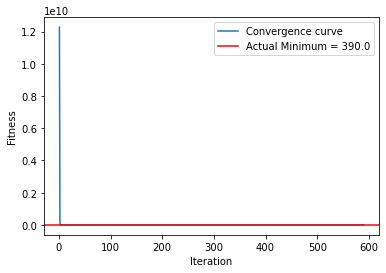

x_minimum :
[-75.42761235 -35.73174602 -57.59559778  38.9098239   52.24762056
 -30.3610222   50.69081913  49.7986688  -71.15509316 -30.78365196
 -43.00093614 -20.08810511  71.52728253  48.02000594 -46.02769154
  -8.16345807 -40.97563237 -13.82740787  35.81651657  57.1377779
  58.58535235 -17.41235689  27.28772874 -62.56238547 -28.81686138
 -86.5285588   48.29259542  -7.58198669 -82.15963498 -72.07882983
  82.24641338  19.58462068 -45.58577275  77.3135174  -12.61289379
 -81.18439041  72.87815379  86.0820888   28.40057393  40.85296505
  -2.04692948  33.44007051 -24.67212213 -17.82366165   2.57744425
 -81.82034168  88.42040229 -34.31802097 -43.9283934   19.64040727]


In [13]:
dim = 50
Minimize_CG(Shifted_Rosenbrock, targetmin=f_bias[2], tol=0.1, bounds_min=-100, bounds_max=100)

D = 500

Particle Swarm Optimization

Number of dimensions : 500
Computational time : 73.24 s
Fitness at minimum (result): 372740043.7084 
Fitness at minimum (real): 390.0000 
Function evaluations : 299700


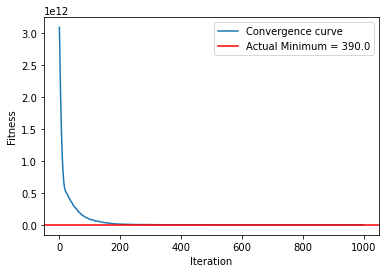

x_minimum :
[-8.54097537e+01 -4.27627354e+01 -7.06477900e+01  4.06183820e+01
  5.81364420e+01 -1.83485004e+01  4.41417375e+01  3.74553549e+01
 -6.48677710e+01 -1.85115821e+01 -4.54018782e+01 -2.26811154e+01
  7.48464312e+01  3.75523002e+01 -3.69900425e+01  4.74402030e-01
 -4.40031844e+01 -4.96072785e+00  4.99660618e+01  4.46403731e+01
  6.17190655e+01 -2.59329172e+01  3.03013659e+01 -5.38945658e+01
 -2.68368640e+01 -8.90609854e+01  4.56283766e+01 -3.53114058e+00
 -8.36512516e+01 -6.49049940e+01  8.70187785e+01  1.09487828e+01
 -5.38548143e+01  6.99937597e+01 -2.49135542e+01 -7.37799165e+01
  6.49966175e+01  8.96557652e+01  1.92478311e+01  2.80474857e+01
 -8.22658401e+00  3.54507340e+01 -2.03740896e+01 -1.10360136e+01
  1.23767449e+01 -8.99949060e+01  7.82372068e+01 -3.18365241e+01
 -4.26750163e+01  8.16192086e+00 -9.17302775e+00 -1.92589619e+01
 -1.81498783e+01  3.24606207e+01 -7.26654443e+01 -2.90022558e+01
  5.34069493e+01 -5.92838501e+01  2.55746604e+01 -3.80890189e+01
  3.50052548e

In [15]:
dim = 500

Minimize_PSO(Shifted_Rosenbrock, targetmin=f_bias[2], nb_particles=300, stable_iter=100, self_confid=2, swarm_confid=15,
            bounds_min = -100, bounds_max = 100)

Conjugate Gradient

Number of dimensions : 500
Optimization terminated successfully.
         Current function value: 390.000307
         Iterations: 5397
         Function evaluations: 4089292
         Gradient evaluations: 8146
Computational time : 292.28 s
Fitness at minimum (result): 390.0003 
Fitness at minimum (real): 390.0000 


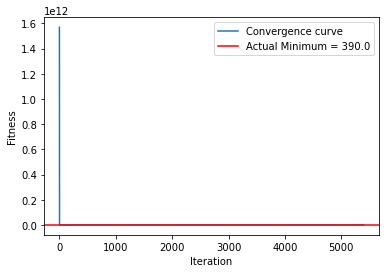

x_minimum :
[-75.42752836 -35.7317016  -57.59564409  38.90984563  52.24768176
 -30.36102772  50.69081431  49.79866077 -71.15514751 -30.78367522
 -43.0009508  -20.08811852  71.52725623  48.01996277 -46.02767981
  -8.16344131 -40.9756443  -13.82735778  35.81657197  57.1377877
  58.58538379 -17.41231587  27.28778522 -62.5623636  -28.8169195
 -86.52863538  48.29261812  -7.58193517 -82.15963831 -72.07887193
  82.24637541  19.58463974 -45.5857432   77.31349808 -12.61296221
 -81.18446189  72.87815784  86.08218099  28.40065178  40.85306629
  -2.04659285  33.44086952 -24.67059355 -17.82064984   2.58348732
 -81.80819526  88.44454514 -34.27036389 -43.8351305   19.8185994
  -9.54309788 -14.68097439 -15.86845753  38.53019    -71.4999599
 -21.56900607  45.44109101 -63.14931696  28.95883416 -47.35024062
  40.97029898 -43.46420475  -5.488085    64.35260993  60.01432006
  -4.3241324  -28.77578107   7.59854702  11.07048487  76.53919023
 -40.60931354 -36.78450254  20.25823567  70.31500795  38.60079728
 -

In [21]:
dim = 500
Minimize_CG(Shifted_Rosenbrock, targetmin=f_bias[2], tol=0.1, bounds_min=-100, bounds_max=100)

The PSO algorithm converges but fails to reach the global minimum, within in a reasonable time after parameter tuning while the conjugate gradient algorithm computes the exact solution to the rosenbrock problem for both D=50 and D=500.